# Test signal delays

In [1]:

import os
import sys

import numpy as np

import pyda
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'xx-large',
          'ytick.labelsize': 'xx-large'}
pylab.rcParams.update(params)

sys.path.insert(0, os.path.abspath('../'))

from pyda.tsdata import TSData
from pyda.xydata import XYData
from pyda.dsp.spectral import psd, tfe
import matplotlib.pyplot as plt
import numpy

FigSize = (15,10) # global setting for figure size


# Create time-series signal

-------- TSData ---------
  name: TS1
  uuid: 29815074-dcdf-41bd-bc69-192ec48e8861
    fs: 10.0
 nsecs: 4.9
 xaxis: Time=(50,)[s]
 yaxis: Amplitude=(50,)[m]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[m]

-----------------------------
-------- TSData ---------
  name: delay(TS1)
  uuid: 29815074-dcdf-41bd-bc69-192ec48e8861
    fs: 10.0
 nsecs: 4.9
 xaxis: Time=(50,)[s]
 yaxis: Amplitude=(50,)[m]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[m]

-----------------------------
-------- TSData ---------
  name: TS1
  uuid: 29815074-dcdf-41bd-bc69-192ec48e8861
    fs: 10.0
 nsecs: 4.9
 xaxis: Time=(50,)[s]
 yaxis: Amplitude=(50,)[m]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[m]

-----------------------------


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Time $\\left[\\,{\\mathrm{s}} \\right]$', ylabel='Amplitude $\\left[\\,{\\mathrm{m}} \\right]$'>],
 []]

<Figure size 1080x720 with 0 Axes>

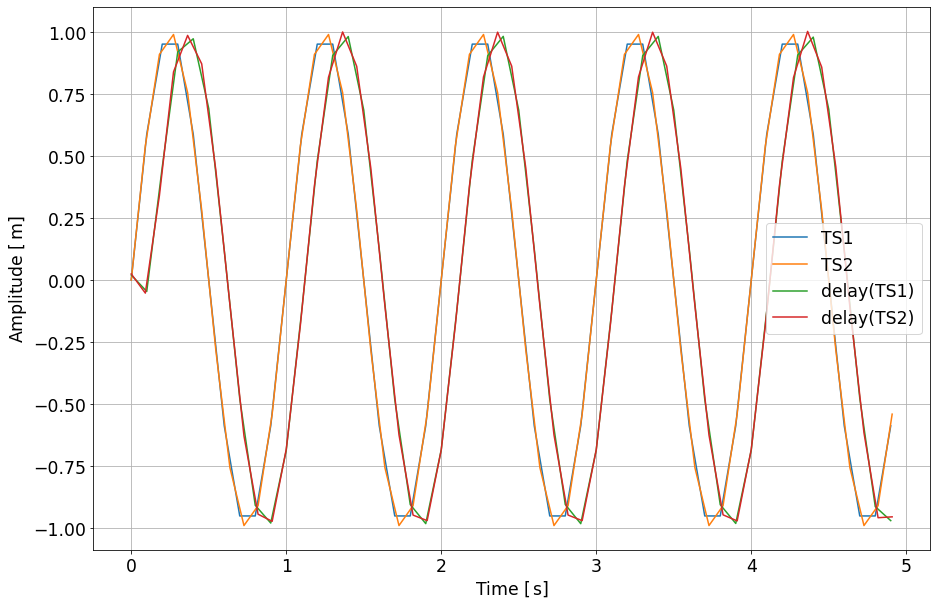

In [2]:

ts1 = TSData.sinewave(nsecs=5, fs=10, f0=1, name="TS1", yunits="m")
ts2 = TSData.sinewave(nsecs=5, fs=11, f0=1, name="TS2", yunits="m")

ts1d = ts1.delay(taps=91, tau=0.12)
ts2d = ts2.delay(taps=91, tau=0.12)

print(ts1)
print(ts1d)

tsc = ts1.deepcopy()
print(tsc)

ts1.plot(ts2, ts1d, ts2d)

Processing PSD with segments of length 290909 and overlap of 145454.0 samples (50%)
<class 'pyda.utils.unit.Unit'>
Processing PSD with segments of length 290909 and overlap of 145454.0 samples (50%)
<class 'pyda.utils.unit.Unit'>
Processing PSD with segments of length 290909 and overlap of 145454.0 samples (50%)
plotting complex data...


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:ylabel='Amplitude $\\left[1/\\,{\\mathrm{Hz}} \\right]$'>,
  <AxesSubplot:xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Phase (º)'>],
 []]

<Figure size 1080x720 with 0 Axes>

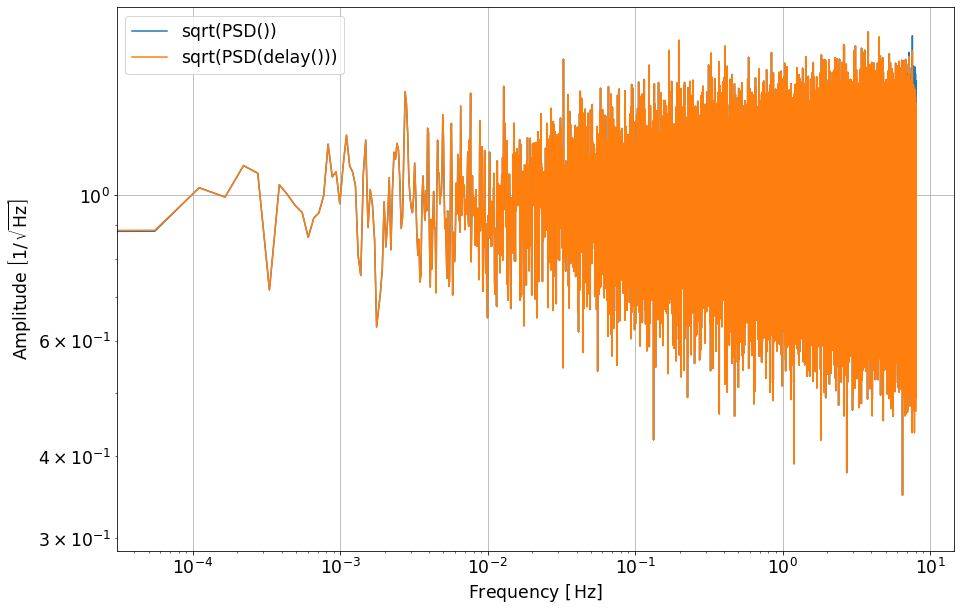

<Figure size 1080x720 with 0 Axes>

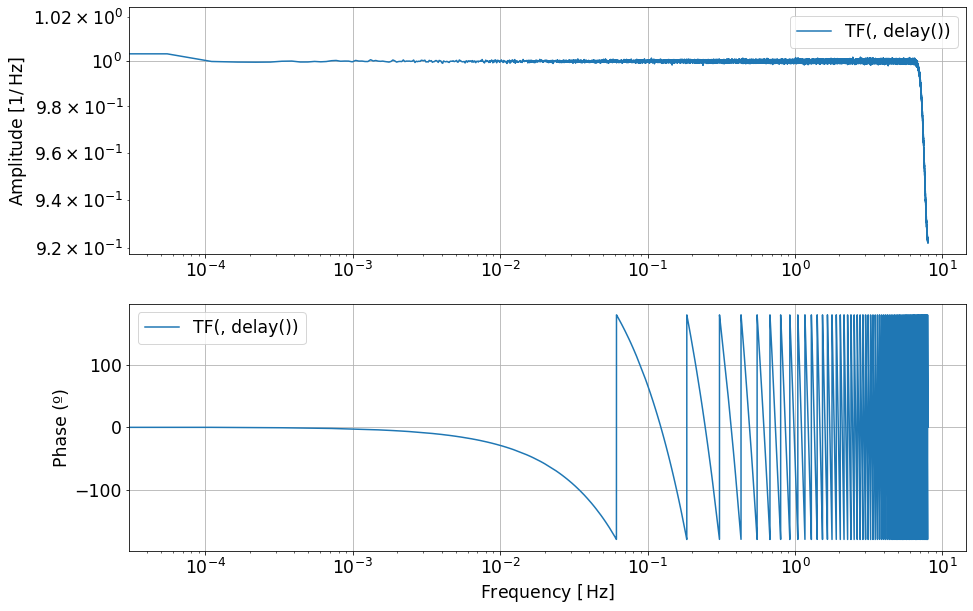

In [3]:
ts3 = TSData.randn(nsecs=1e5, fs=16)

ts3d = ts3.delay(tau=8.1333)

S_ts3 = psd(ts3, navs=10)
S_ts3d = psd(ts3d, navs=10)

S_ts3.sqrt().loglog(S_ts3d.sqrt())

T = tfe(ts3, ts3d, navs=10)
T.loglog()
